In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def PCA(X, d):
    #X(m, n),n个m维列向量
    #中心化
    X -= np.sum(X, axis=1).reshape((X.shape[0], 1))
    
    #对XX^T做特征值分解
    lamda, W = np.linalg.eig(X.dot(X.T))
    
    #排序
    idx = np.argsort(lamda)
    return W[:, idx[-d:]]

In [36]:
def Print(X):
    ax=plt.subplot(111,projection='3d')
    ax.scatter(X[0, :], X[1, :], X[2, :])
    plt.show()

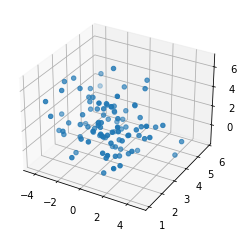

In [37]:
n = 100
miu = [0, 3, 2]
sigma = np.array([[5, 0, 0], [0, 1, 0], [0, 0, 3]])
X = []
for _ in range(n):
    X.append(np.random.multivariate_normal(miu, sigma))
X = np.array(X).T
Print(X)

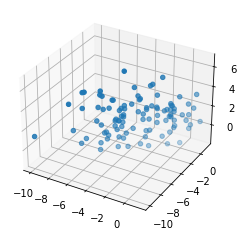

In [38]:
X = np.array([[1, -1, 0], [1, -1, 0], [0, 0, 1]]).dot(X)
Print(X)

In [39]:
W = PCA(X, 2)
X_hat = W.T.dot(X)
print(X_hat.shape)

(2, 100)


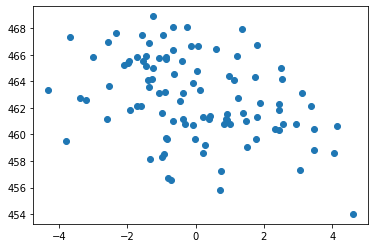

In [40]:
plt.scatter(X_hat[0, :], X_hat[1, :])
plt.show()

In [64]:
from sklearn.datasets import fetch_lfw_people
import math

In [67]:
faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
print(X.shape)

(1348, 2914)


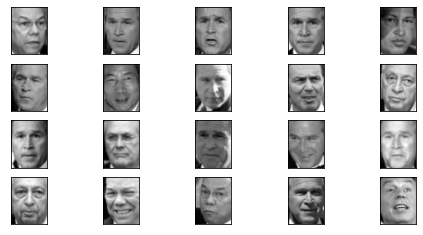

In [45]:
fig, axes = plt.subplots(4, 5
                       , figsize=(8, 4)
                       , subplot_kw = {"xticks":[],"yticks":[]}
                       )
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i, :, :], cmap='gray')

In [68]:
W1 = PCA(X, 300)
V = W1.T.dot(X)

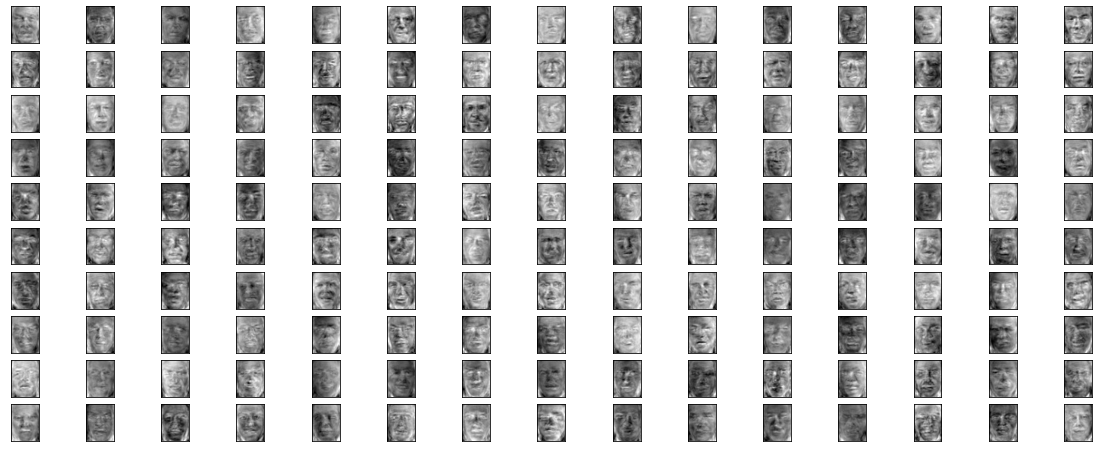

In [69]:
fig, axes = plt.subplots(10, 15, figsize=(20, 8), subplot_kw={"xticks": [], "yticks": []})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i, :].reshape(62, 47), cmap="gray")

In [70]:
T = W1.dot(V)

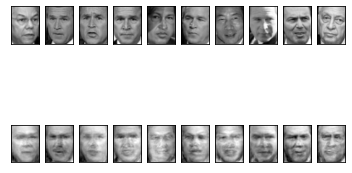

In [71]:
fig, axes = plt.subplots(2, 10, subplot_kw={'xticks': [], 'yticks': []})
for i in range(10):
    axes[0, i].imshow(X[i, :].reshape(62, 47), cmap='binary_r')
    axes[1, i].imshow(T[i, :].reshape(62, 47), cmap='binary_r')

In [65]:
def psnr(img1, img2):
    mse = np.mean((img1/255 - img2/255) ** 2)
    if mse < 1e-10:
        return 100
    return 20 * math.log10(1 / math.sqrt(mse))

In [66]:
for i in range(10):
    print(psnr(X[i, :], T[i, :]))

2.9375126340784985
6.70786437043783
12.3276516057555
7.648685877882897
8.129692480447718
9.901822078948594
4.29360127428338
8.998234819122704
9.371819568755463
2.0304821892311256
